# Exploratory Data Analysis for Aadhaar Update Data

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

In [2]:
# Data Loading

# Load the dataset
df = pd.read_csv("data/merged_data_clean.csv")

# Display the first few rows
df.head()

,state,district,pincode,demo_age_5_17,demo_age_17_,date
0,UTTAR PRADESH,GORAKHPUR,273213,49,529,2025-03-01
1,ANDHRA PRADESH,CHITTOOR,517132,22,375,2025-03-01
2,GUJARAT,RAJKOT,360006,65,765,2025-03-01
3,ANDHRA PRADESH,SRIKAKULAM,532484,24,314,2025-03-01
4,RAJASTHAN,UDAIPUR,313801,45,785,2025-03-01


## Data Overview

In [3]:
# Dataset information
df.info()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592749 entries, 0 to 1592748
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   state          1592749 non-null  object
 1   district       1592749 non-null  object
 2   pincode        1592749 non-null  int64 
 3   demo_age_5_17  1592749 non-null  int64 
 4   demo_age_17_   1592749 non-null  int64 
 5   date           1592749 non-null  object
dtypes: int64(3), object(3)
memory usage: 72.9+ MB


,pincode,demo_age_5_17,demo_age_17_
count,1.592749e+06,1.592749e+06,1.592749e+06
mean,5.266174e+05,2.257720e+00,2.071105e+01
std,1.975655e+05,1.394176e+01,1.178981e+02
min,1.100010e+05,0.000000e+00,0.000000e+00
25%,3.960650e+05,0.000000e+00,2.000000e+00
50%,5.242010e+05,1.000000e+00,6.000000e+00
75%,6.915830e+05,2.000000e+00,1.500000e+01
max,8.554560e+05,2.690000e+03,1.616600e+04


## Univariate Analysis

In [4]:
# Extract month from date for analysis
df['month'] = pd.to_datetime(df['date']).dt.month

# Value counts for categorical columns
print("State value counts:")
print(df['state'].value_counts())
print("\nDistrict value counts:")
print(df['district'].value_counts())
print("\nMonth value counts:")
print(df['month'].value_counts())

State value counts:
state
ANDHRA PRADESH                              154202
TAMIL NADU                                  153219
UTTAR PRADESH                               132330
MAHARASHTRA                                 126181
WEST BENGAL                                 124915
KARNATAKA                                   120135
KERALA                                       82151
ODISHA                                       81843
GUJARAT                                      75085
BIHAR                                        74531
TELANGANA                                    70041
RAJASTHAN                                    68424
MADHYA PRADESH                               60114
ASSAM                                        47385
PUNJAB                                       38061
JHARKHAND                                    31216
CHHATTISGARH                                 27277
HARYANA                                      22305
HIMACHAL PRADESH                             21823
UTTAR

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24416\2092043941.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')


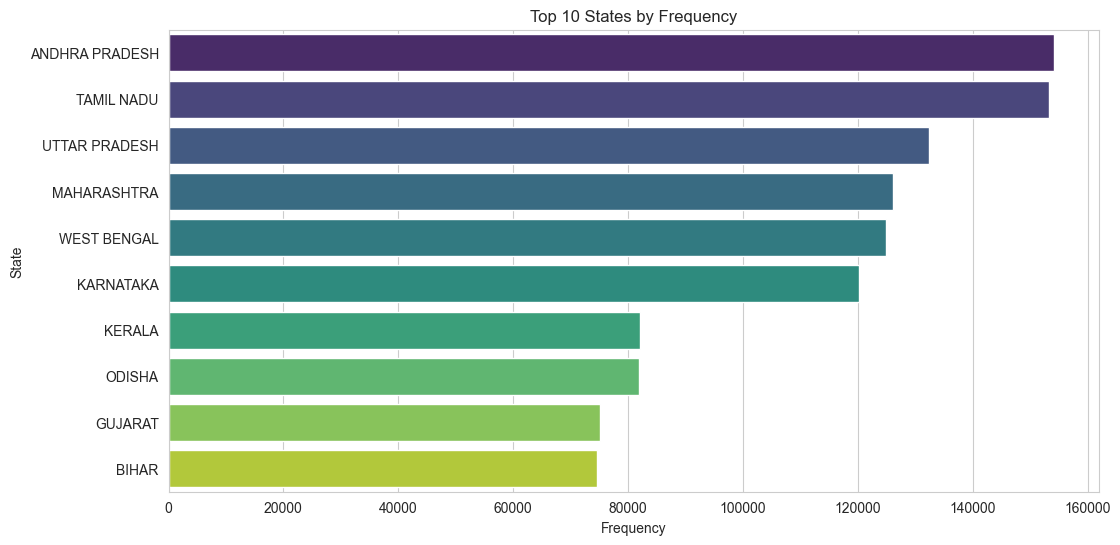

In [5]:
# Top 10 states by frequency
top_states = df['state'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')
plt.title('Top 10 States by Frequency')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24416\835277345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_districts.values, y=top_districts.index, palette='viridis')


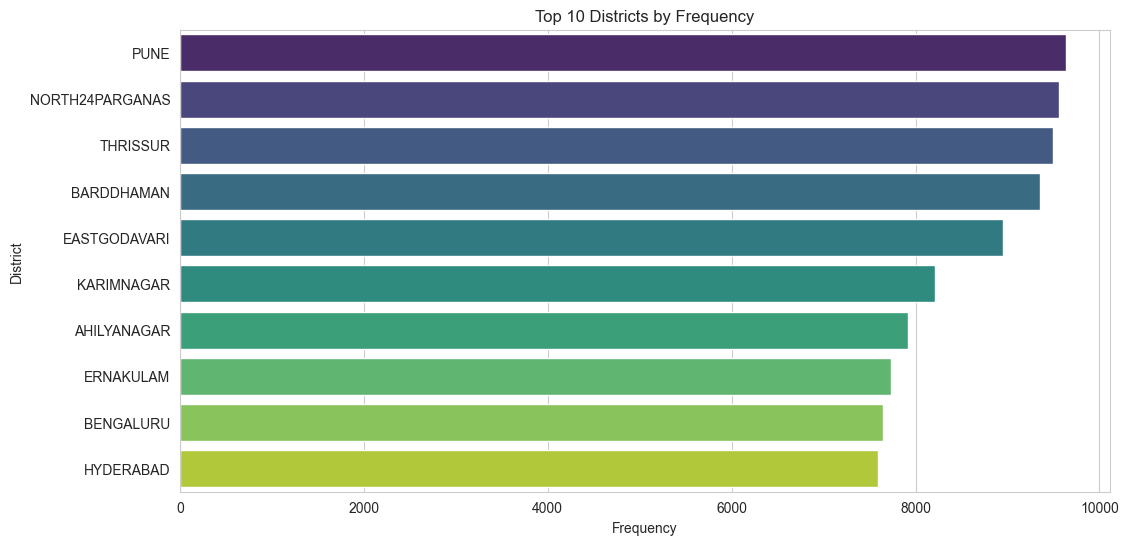

In [6]:
# Top 10 districts by frequency
top_districts = df['district'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_districts.values, y=top_districts.index, palette='viridis')
plt.title('Top 10 Districts by Frequency')
plt.xlabel('Frequency')
plt.ylabel('District')
plt.show()

## Numerical Analysis

Numeric columns: ['pincode', 'demo_age_5_17', 'demo_age_17_', 'month']
Valid numeric columns for plotting: ['demo_age_5_17', 'demo_age_17_', 'month']


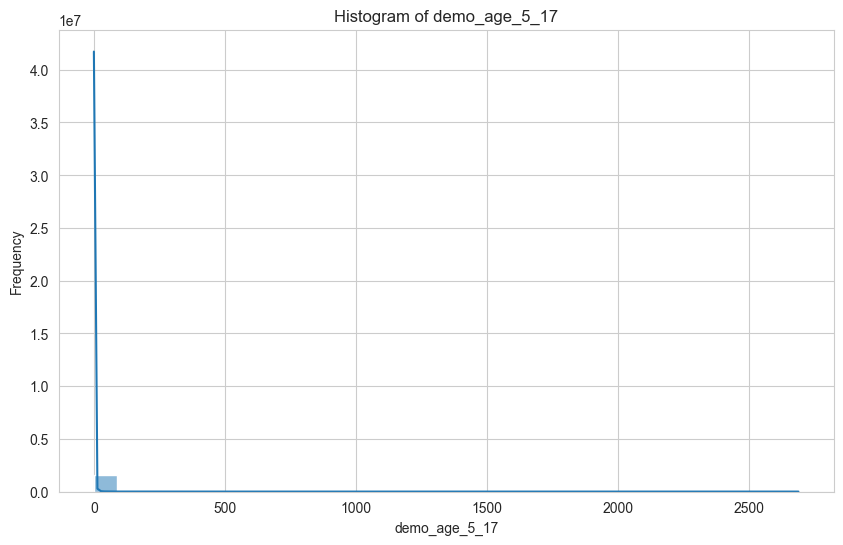

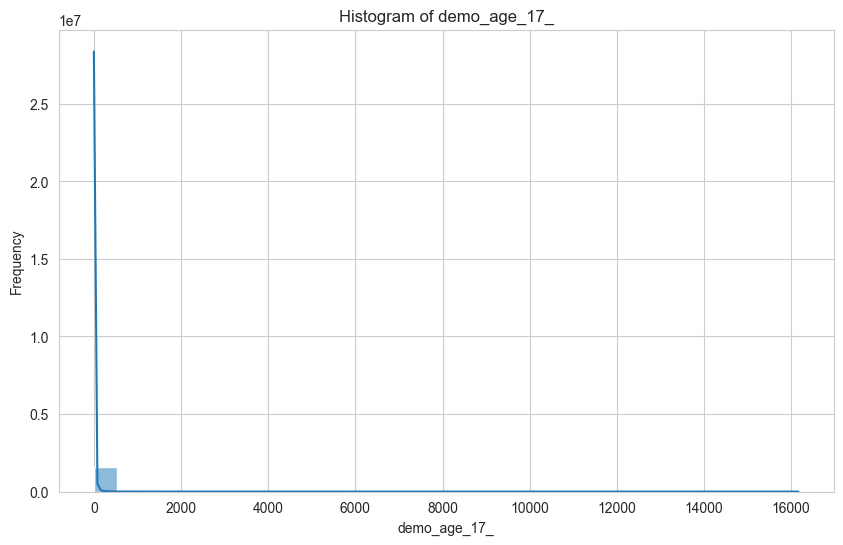

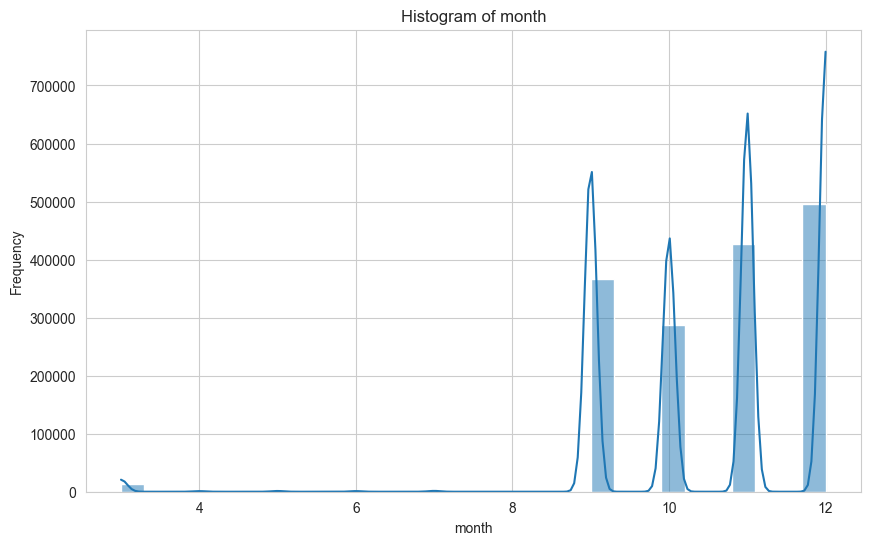

In [7]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns:", list(numeric_cols))

# Exclude identifier columns (like pincode, ids)
exclude_cols = [col for col in numeric_cols if 'id' in col.lower() or 'pincode' in col.lower()]
valid_numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
print("Valid numeric columns for plotting:", valid_numeric_cols)

# Plot histograms with KDE for valid numeric columns
for col in valid_numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

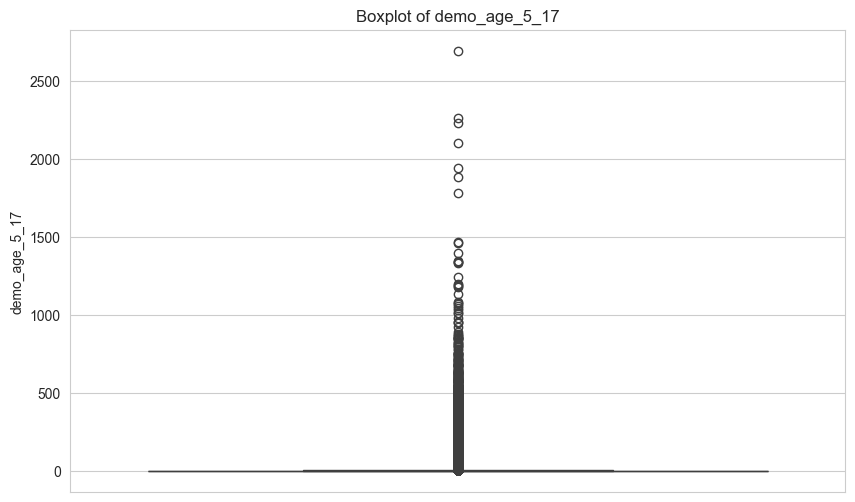

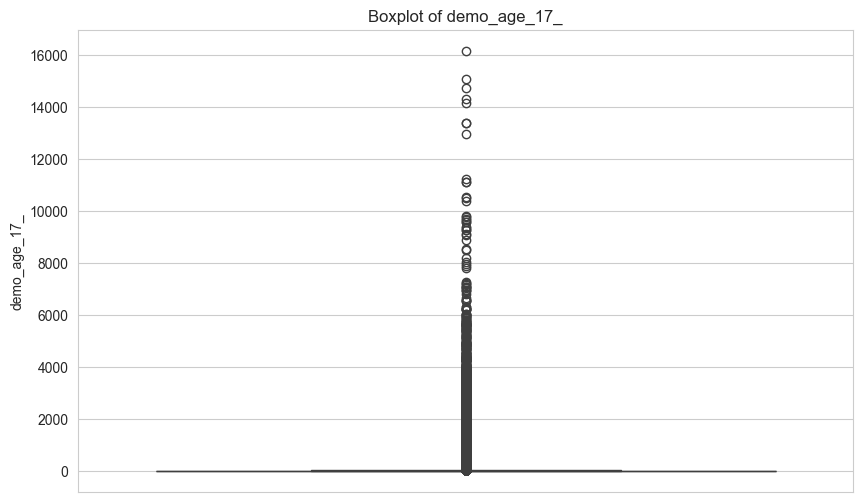

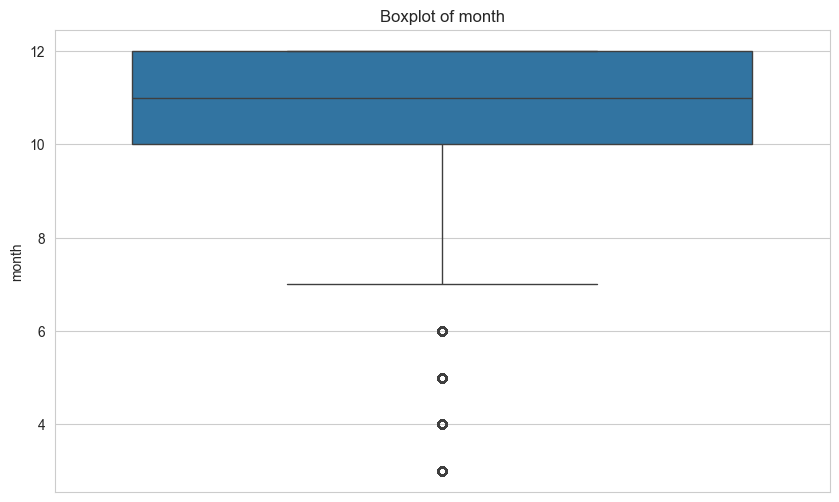

In [8]:
# Plot boxplots for valid numeric columns
for col in valid_numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

## Time-Based Analysis

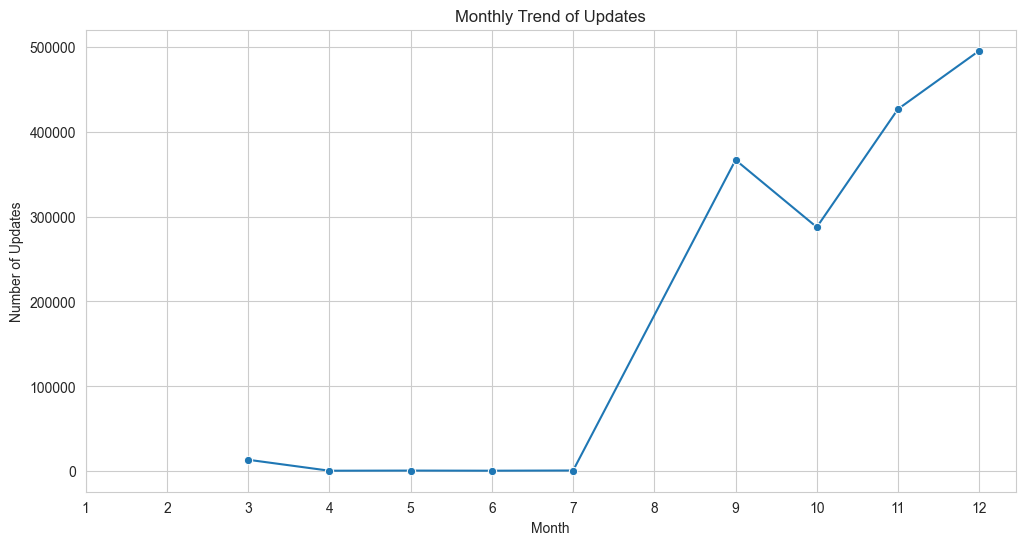

In [9]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month
df['month_extracted'] = df['date'].dt.month

# Group by month and count
monthly_trend = df.groupby('month_extracted').size()

# Plot monthly trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o')
plt.title('Monthly Trend of Updates')
plt.xlabel('Month')
plt.ylabel('Number of Updates')
plt.xticks(range(1, 13))
plt.show()

## Pressure Index Analysis

Top 10 High-Pressure Districts:
            district  count  pressure_index
680             PUNE   9633        5.648864
619  NORTH24PARGANAS   9558        5.604883
849         THRISSUR   9490        5.565007
81        BARDDHAMAN   9356        5.486429
247     EASTGODAVARI   8956        5.251866
422       KARIMNAGAR   8213        4.816165
3        AHILYANAGAR   7922        4.645520
258        ERNAKULAM   7731        4.533517
101        BENGALURU   7641        4.480740
339        HYDERABAD   7594        4.453179


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24416\909357.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pressure_index', y='district', data=top_10_pressure, palette='Reds_r')


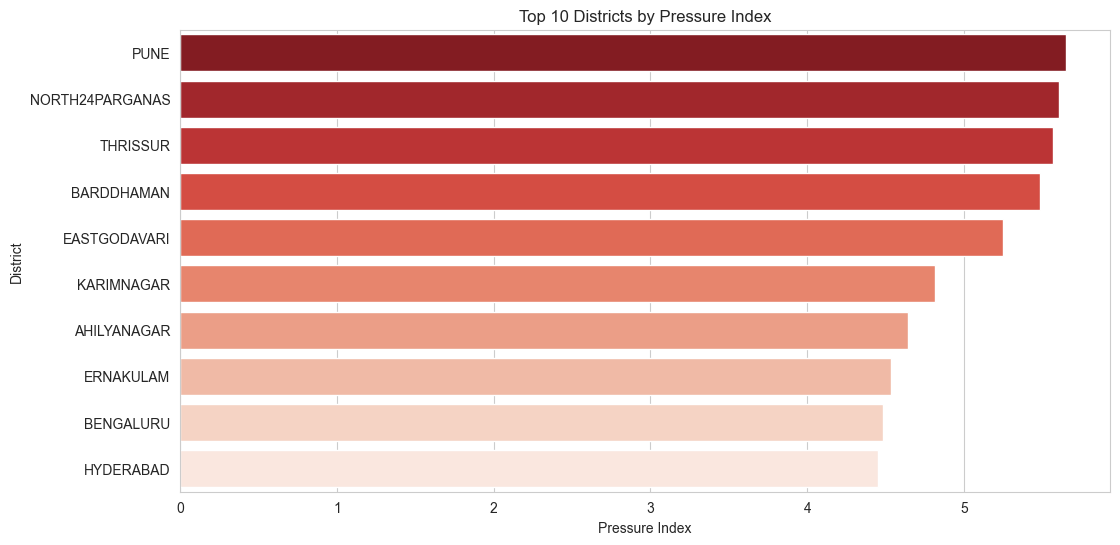

In [10]:
# Compute district-level update counts
district_counts = df.groupby('district').size().reset_index(name='count')

# Create normalized pressure_index
mean_count = district_counts['count'].mean()
district_counts['pressure_index'] = district_counts['count'] / mean_count

# Sort by pressure_index descending
district_counts = district_counts.sort_values('pressure_index', ascending=False)

# Display top 10 high-pressure districts
print("Top 10 High-Pressure Districts:")
print(district_counts.head(10))

# Plot bar chart for top 10 districts
top_10_pressure = district_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='pressure_index', y='district', data=top_10_pressure, palette='Reds_r')
plt.title('Top 10 Districts by Pressure Index')
plt.xlabel('Pressure Index')
plt.ylabel('District')
plt.show()

### Explanation of Pressure Index
The pressure index is calculated as the ratio of a district's update count to the average update count across all districts. A higher pressure index indicates a district with disproportionately high update activity, suggesting greater administrative load or demand for Aadhaar services. This metric helps UIDAI identify bottlenecks and prioritize resource allocation for efficient service delivery.

## Key Insights & Policy Implications

- **Concentration of Updates**: A significant portion of Aadhaar updates are concentrated in a few states and districts, indicating uneven demand across regions.
- **Urban vs Rural Pressure**: Districts with higher population density show elevated pressure indices, highlighting the need for urban-focused service enhancements.
- **Seasonal Patterns**: Monthly trends reveal spikes in updates during certain periods, suggesting the importance of seasonal resource planning.
- **Service Bottlenecks**: High-pressure districts identified by the pressure index point to potential administrative bottlenecks that could benefit from additional support.
- **UIDAI Decision-Making**: This analysis enables UIDAI to allocate resources efficiently, improve service delivery, and address regional disparities in Aadhaar update processes.

## Bivariate Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24416\1034092601.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='update_count', y='state', data=top_10_states, palette='viridis')


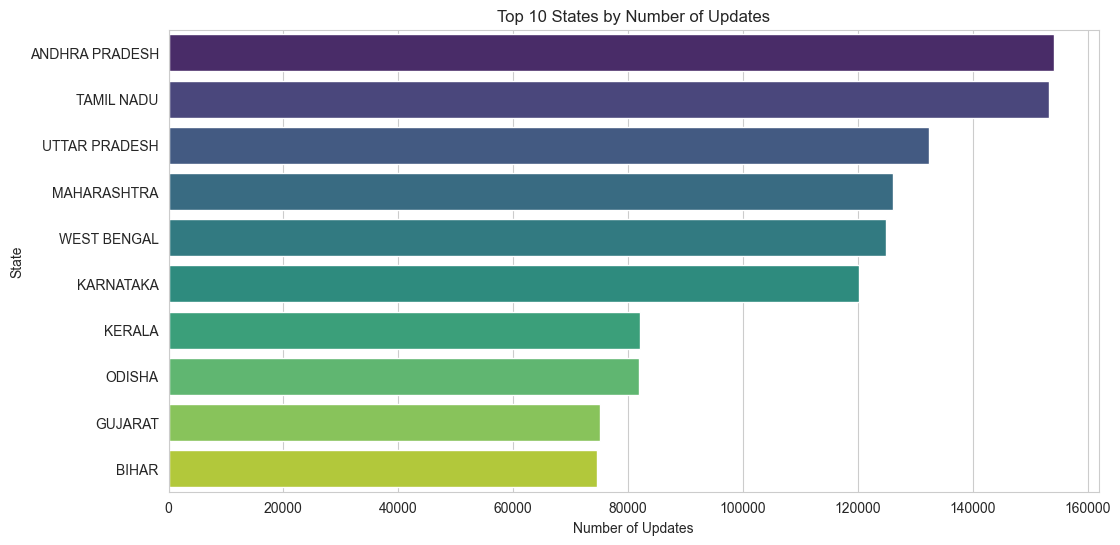

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24416\1034092601.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='update_count', y='district', data=top_10_districts, palette='viridis')


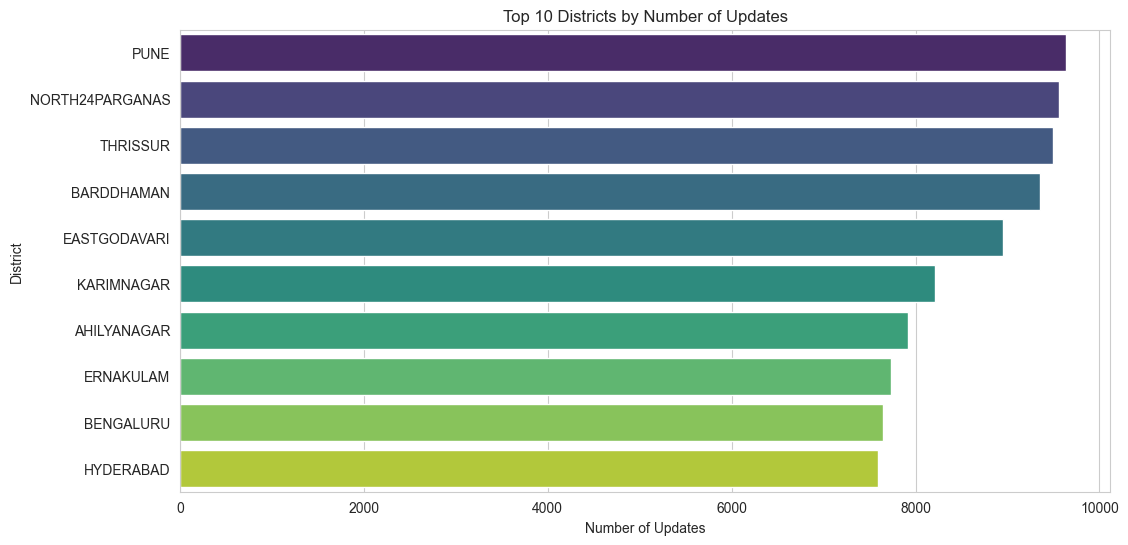

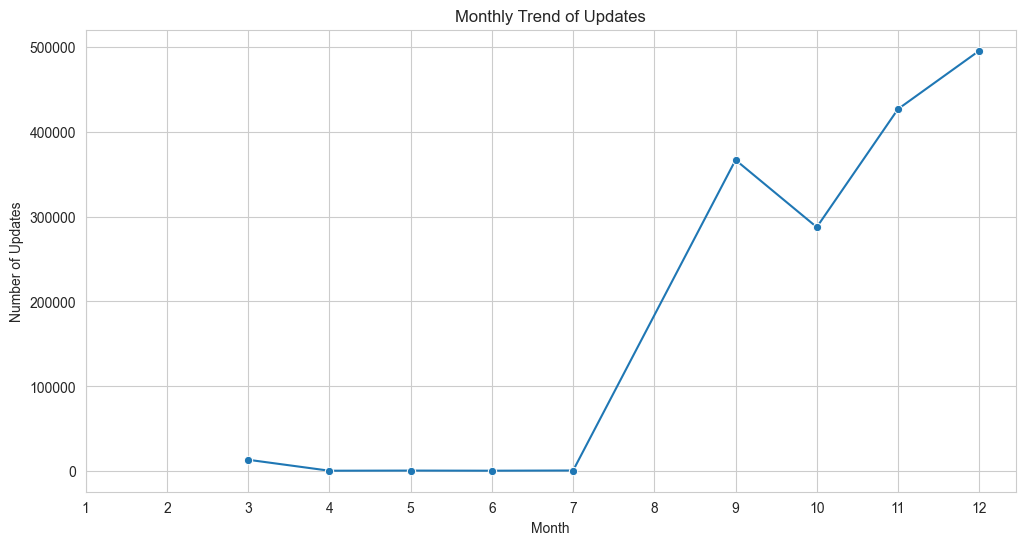

In [11]:
# State vs Number of Updates
state_updates = df.groupby('state').size().reset_index(name='update_count').sort_values('update_count', ascending=False)
top_10_states = state_updates.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='update_count', y='state', data=top_10_states, palette='viridis')
plt.title('Top 10 States by Number of Updates')
plt.xlabel('Number of Updates')
plt.ylabel('State')
plt.show()

# District vs Number of Updates
district_updates = df.groupby('district').size().reset_index(name='update_count').sort_values('update_count', ascending=False)
top_10_districts = district_updates.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='update_count', y='district', data=top_10_districts, palette='viridis')
plt.title('Top 10 Districts by Number of Updates')
plt.xlabel('Number of Updates')
plt.ylabel('District')
plt.show()

# Month vs Number of Updates
month_updates = df.groupby('month').size().reset_index(name='update_count')
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='update_count', data=month_updates, marker='o')
plt.title('Monthly Trend of Updates')
plt.xlabel('Month')
plt.ylabel('Number of Updates')
plt.xticks(range(1, 13))
plt.show()

### Bivariate Analysis Insights
This section examines relationships between two variables: location (state/district) and time (month) against update frequency. The bar plots reveal concentration of updates in specific states and districts, while the line plot shows seasonal patterns. These patterns highlight regional disparities and temporal fluctuations, crucial for UIDAI to allocate resources effectively and plan for peak periods.

## Trivariate Analysis

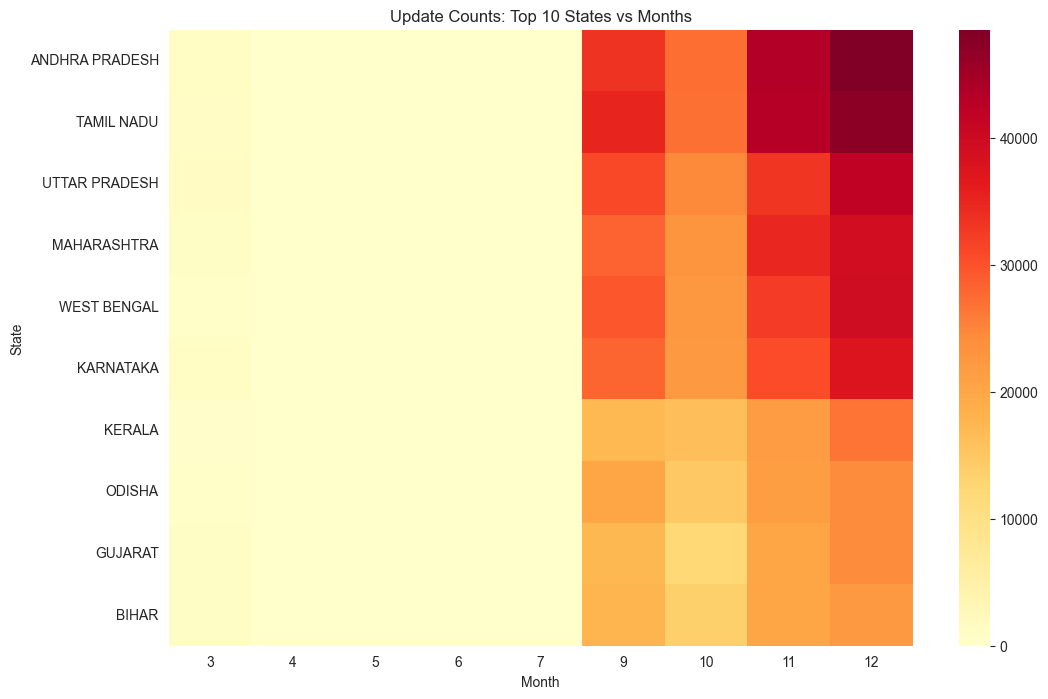

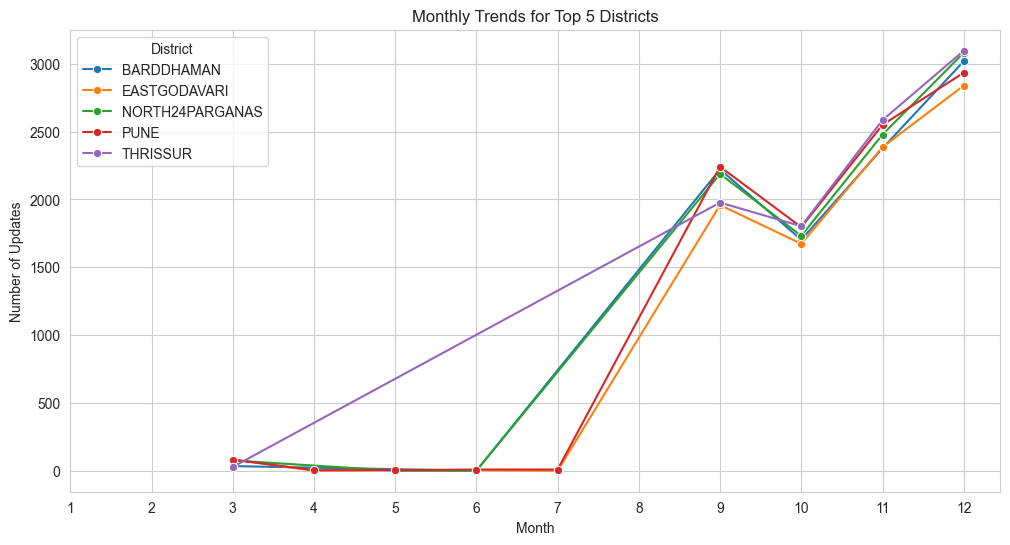

In [12]:
# State + Month + Update Count Heatmap
state_month_pivot = df.pivot_table(values=None, index='state', columns='month', aggfunc='size', fill_value=0)
top_10_states_list = state_updates['state'].head(10).tolist()
state_month_pivot_top = state_month_pivot.loc[top_10_states_list]
plt.figure(figsize=(12, 8))
sns.heatmap(state_month_pivot_top, cmap='YlOrRd', annot=False)
plt.title('Update Counts: Top 10 States vs Months')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()

# District + Month + Update Count Multi-line
top_5_districts_list = district_updates['district'].head(5).tolist()
district_month = df[df['district'].isin(top_5_districts_list)].groupby(['district', 'month']).size().reset_index(name='update_count')
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='update_count', hue='district', data=district_month, marker='o')
plt.title('Monthly Trends for Top 5 Districts')
plt.xlabel('Month')
plt.ylabel('Number of Updates')
plt.xticks(range(1, 13))
plt.legend(title='District')
plt.show()

### Trivariate Analysis Insights
By combining three variables—location, time, and frequency—this analysis uncovers complex patterns not visible in simpler views. The heatmap shows how update demands vary across states and months, revealing seasonal peaks in specific regions. The multi-line chart for top districts highlights individual trends, showing how pressure builds differently over time. Together, these reveal that high-pressure areas experience amplified seasonal effects, justifying targeted interventions that univariate or bivariate analyses alone cannot identify.

### Linking to Pressure Index
The bivariate and trivariate patterns demonstrate how update frequency varies by location and time, creating hotspots of administrative pressure. Normalizing these counts against the average provides a standardized pressure index, enabling fair comparisons across districts and highlighting areas needing urgent attention for efficient UIDAI service delivery.